## Local Outlier Factor Practice (Novelty detection)

 - Ionosphere dataset

 - Scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score

import datapackage
import json
import urllib.request

%matplotlib inline

In [2]:
data_url = 'https://datahub.io/machine-learning/ionosphere/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)
resources = package.resources

In [3]:
package.descriptor.keys()

dict_keys(['datahub', 'description', 'id', 'licenses', 'name', 'readme', 'resources', 'title', 'views', 'profile'])

In [4]:
package.descriptor['readme']

'The resources for this dataset can be found at https://www.openml.org/d/59\n\nAuthor: Space Physics Group, Applied Physics Laboratory, Johns Hopkins University. Donated by Vince Sigillito.  \nSource: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/ionosphere)  \nPlease cite: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html) \n\nJohns Hopkins University Ionosphere database  \nThis radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  \n\n### Attribute information\nReceived signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system.  Instances in this database are described by 2 attributes per pulse number, corresponding to the complex values returned by the function res

In [5]:
package.resource_names

['validation_report',
 'ionosphere_csv',
 'ionosphere_json',
 'ionosphere_zip',
 'ionosphere_arff',
 'ionosphere']

In [6]:
data = pd.read_csv(resources[1].descriptor['path'])
data.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [8]:
X = data.values[:, 2:-1]
y = data.values[:,-1]
y = (y == "b") * 1

print(X.shape)
print(np.unique(y, return_counts=True))

n_inlier = sum(y == 0)

arr = X[y==0]
np.random.shuffle(arr)
X = np.r_[arr, X[y==1]]
y = np.r_[np.zeros(n_inlier), np.ones(len(y) - n_inlier)]

(351, 32)
(array([0, 1]), array([225, 126]))


In [9]:
## Train, Test split
train_ratio = 0.8
train_size = int(n_inlier * train_ratio)

X_train = X[:train_size,:]
X_test = X[train_size:,:]
y_test = y[train_size:]

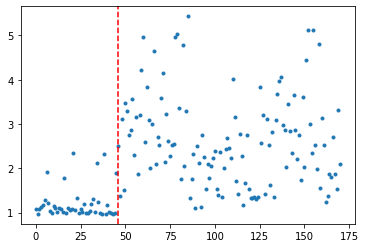

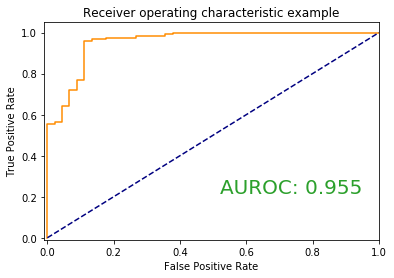

In [10]:
clf = LocalOutlierFactor(novelty=True, contamination=0.1)
clf.fit(X_train)

y_pred = clf.predict(X_test)
anomaly_score = - clf.score_samples(X_test)
n_test_inliers = sum(y_test == 0)

auroc = roc_auc_score(y_test, anomaly_score)

plt.plot(anomaly_score,".")
plt.axvline(x = n_test_inliers + 1, color='r', linestyle='--', label='normal:abnormal')
plt.show()

x, y , _ = roc_curve(y_test, anomaly_score)
plt.plot(x,y, color="darkorange" )
plt.title("Receiver operating characteristic example")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.text(0.95, 0.2, "AUROC: " +str(round(auroc, 3)), {"color": "C2", "fontsize": 20},
va="bottom", ha="right")

plt.xlim([- 0.01, 1.0])
plt.ylim([- 0.01, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


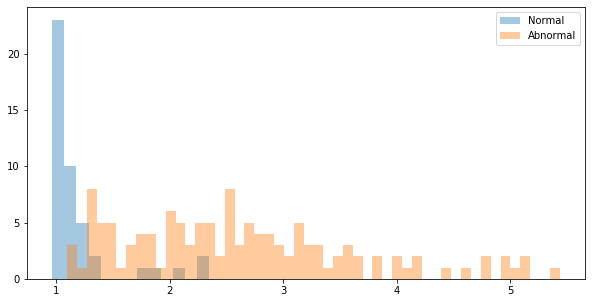

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(anomaly_score[:n_test_inliers],kde=False, label="Normal")
sns.distplot(anomaly_score[n_test_inliers:],bins=50, kde=False, label="Abnormal")
plt.legend()

In [21]:
# with urllib.request.urlopen(package.resources[0].descriptor['path']) as url:
#     data = json.loads(url.read().decode())
    
# print(data)